<h1>Soal 1: Pemahaman Algoritma</h1>

Jawab Pertanyaan di bawah ini dengan penyampaian bahasa sendiri!

1. Bagaimana proses algoritma KNN?

2. Jelaskan minimal 2 kekurangan dari algoritma KNN?

Jawab:




1. KNN dilakukan dengan mencari kelompok k objek dalam data training yang paling dekat (mirip) dengan objek pada data baru atau data testing

2. - Perlu menunjukkan parameter K (jumlah tetangga terdekat) 
   - Tidak menangani nilai hilang (missing value) secara implisit 
   - Sensitif terhadap data pencilan (outlier) 
   - Rentan terhadap variabel yang non-informatif

<h1>Soal 2: Pengaplikasian Algoritma KNN</h1>

- Buatlah model KNN
- Training model tersebut kepada data X_train dengan hyperparameter kombinasi antara  2<= k <=20 dan weights bernilai 'uniform', dan 'distance'  
- Lakukan prediksi terhadap data X_test untuk model di setiap kombinasi k dan weights
- Score dengan accuracy dari hasil prediksi terhadap data X_test untuk setiap kombinasi hyperparameter, masukan score tersebut ke dalam objek list dengan di groupkan berdasarkan jenis weights, sehingga di akhir kita punya variable misalkan list_uniform_score, dan list_distance_score
- Plot kedua list tersebut dengan lineplot kedalam satu axis dan bandingkan hasilnya

In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np

wine = load_wine()
df = pd.DataFrame(np.c_[wine['data'], wine['target']], columns= wine['feature_names'] + ['class'])

#Preprocessing data
X = df.drop('class', axis=1)
y = df['class']

from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from itertools import product
import matplotlib.pyplot as plt

ks = np.arange(2, 20)
weights = ['uniform', 'distance']

def knn_predict(k, weight):
  model = KNeighborsClassifier(n_neighbors=k, weights=weight)
  model.fit(X_train, y_train)
  score = model.score(X_test, y_test)
  return score

Uniform_Scores = []
Distance_Scores = []

for k, weight in product(ks, weights):
  score = knn_predict(k, weight)
  if weight == 'uniform':
    Uniform_Scores.append(score)
  elif weight == 'distance':
    Distance_Scores.append(score)

In [3]:
print( 'Uniform Scores: ', Uniform_Scores)


Uniform Scores:  [0.6944444444444444, 0.8055555555555556, 0.7222222222222222, 0.6666666666666666, 0.6388888888888888, 0.75, 0.6388888888888888, 0.6944444444444444, 0.6944444444444444, 0.7222222222222222, 0.6388888888888888, 0.6666666666666666, 0.6388888888888888, 0.6666666666666666, 0.6111111111111112, 0.6666666666666666, 0.6388888888888888, 0.6666666666666666]


In [4]:
print( 'Distance Scores: ', Distance_Scores)

Distance Scores:  [0.75, 0.8333333333333334, 0.7777777777777778, 0.75, 0.7222222222222222, 0.75, 0.6944444444444444, 0.7222222222222222, 0.6944444444444444, 0.6944444444444444, 0.6944444444444444, 0.6944444444444444, 0.6944444444444444, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666]


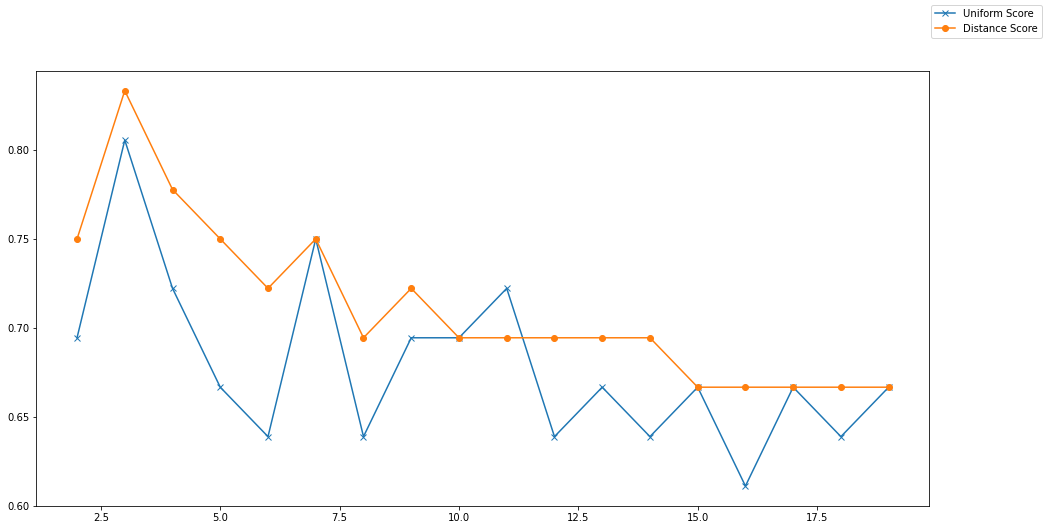

In [6]:
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(ks, Uniform_Scores, label='Uniform Score', marker='x')
ax.plot(ks, Distance_Scores, label='Distance Score', marker='o')

fig.legend()
plt.show()

Contoh Output yang diharapkan

Uniform Scores:
[0.6944444444444444,
 0.8055555555555556,
 0.7222222222222222,
 0.6666666666666666,
 0.6388888888888888,
 0.75,
 0.6388888888888888,
 0.6944444444444444,
 0.6944444444444444,
 0.7222222222222222,
 0.6388888888888888,
 0.6666666666666666,
 0.6388888888888888,
 0.6666666666666666,
 0.6111111111111112,
 0.6666666666666666,
 0.6388888888888888,
 0.6666666666666666,
 0.6111111111111112]

Distance scores:
[0.75,
 0.8333333333333334,
 0.7777777777777778,
 0.75,
 0.7222222222222222,
 0.75,
 0.6944444444444444,
 0.7222222222222222,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666]
```



 


![alt text](https://drive.google.com/uc?id=1pppy_BWQsg5tdgOBEU1GgiHSklLLoimt)